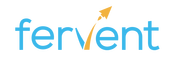
# Estimating the Market Risk of a Stock II - Applied
In this walkthrough, you'll learn how to the risk of a multi asset portfolio.

Remember that Beta of a stock $j$ is calculated as...
$$\beta_j = \frac{\sigma_{r_j,r_m}}{\sigma_{r_m}^2} \equiv \frac{\frac{1}{n-1}\sum_{t=1}^n(r_j-E[r_j])(r_m-E[r_m])}{\frac{1}{n-1}\sum_{t=1}^n(r_m-E[r_m])^2}
$$

Where:  
$\sigma_{r_j,r_m} = $ Covariance between $r_j$ and $r_m$  
$\sigma_{r_m}^2 = $ Variance of the market  
$r_j = $ Return on a stock $j$  
$r_m = $ Return on the market  
$E[r_j] = $ Expected Return on a stock $j$  
$E[r_m] = $ Expected Return on the market  

In [1]:
# Import package dependencies
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
# Proxying the 'market' by the S&P500
df = pd.read_csv('../data/googl_sp500_price.csv')

In [3]:
df.head()

,date_gsheets,price_googl,price_sp500
0,01/03/2012 16:00,332.70,1277.06
1,01/04/2012 16:00,334.14,1277.30
2,01/05/2012 16:00,329.51,1281.06
3,01/06/2012 16:00,325.01,1277.81
4,01/09/2012 16:00,311.23,1280.70


In [4]:
# Set the date column as the index to allow computations for the whole dataframe
df.set_index('date_gsheets', inplace=True)

In [5]:
df.head()

,price_googl,price_sp500
date_gsheets,,
01/03/2012 16:00,332.70,1277.06
01/04/2012 16:00,334.14,1277.30
01/05/2012 16:00,329.51,1281.06
01/06/2012 16:00,325.01,1277.81
01/09/2012 16:00,311.23,1280.70


In [6]:
# Calculate returns of GOOGL and the S&P500
returns_df = df.pct_change(1)

In [7]:
returns_df.head()

,price_googl,price_sp500
date_gsheets,,
01/03/2012 16:00,NaN,NaN
01/04/2012 16:00,0.004328,0.000188
01/05/2012 16:00,-0.013856,0.002944
01/06/2012 16:00,-0.013657,-0.002537
01/09/2012 16:00,-0.042399,0.002262


In [8]:
# Get rid of NaN observations
returns_df.dropna(inplace=True)

In [9]:
returns_df.head()

,price_googl,price_sp500
date_gsheets,,
01/04/2012 16:00,0.004328,0.000188
01/05/2012 16:00,-0.013856,0.002944
01/06/2012 16:00,-0.013657,-0.002537
01/09/2012 16:00,-0.042399,0.002262
01/10/2012 16:00,0.001092,0.008886


In [10]:
# Rename columns to better represent the data
new_col_names = ['r_googl', 'r_sp500']
returns_df.columns = new_col_names

In [11]:
returns_df.head()

,r_googl,r_sp500
date_gsheets,,
01/04/2012 16:00,0.004328,0.000188
01/05/2012 16:00,-0.013856,0.002944
01/06/2012 16:00,-0.013657,-0.002537
01/09/2012 16:00,-0.042399,0.002262
01/10/2012 16:00,0.001092,0.008886


In [12]:
# Calculate the deviations of each observation for GOOGL and the S&P500
deviations = returns_df - returns_df.mean()

In [13]:
deviations.head()

,r_googl,r_sp500
date_gsheets,,
01/04/2012 16:00,0.003468,-0.000331
01/05/2012 16:00,-0.014717,0.002425
01/06/2012 16:00,-0.014517,-0.003056
01/09/2012 16:00,-0.043259,0.001743
01/10/2012 16:00,0.000232,0.008367


In [14]:
# Sanity check
# Estimate the deviation of the first observation of GOOGL
returns_df['r_googl'].iloc[0] - returns_df['r_googl'].mean()

0.0034676852055902274

In [15]:
# Rename columns to better represent the data
new_col_names = ['deviations_googl', 'deviations_sp500']
deviations.columns = new_col_names

In [16]:
deviations.head()

,deviations_googl,deviations_sp500
date_gsheets,,
01/04/2012 16:00,0.003468,-0.000331
01/05/2012 16:00,-0.014717,0.002425
01/06/2012 16:00,-0.014517,-0.003056
01/09/2012 16:00,-0.043259,0.001743
01/10/2012 16:00,0.000232,0.008367


In [17]:
# Calculate the product of deviations
# Note that this will be a pandas Series object, and NOT a pandas Dataframe object.
product_deviations = deviations['deviations_googl'] * deviations['deviations_sp500']

In [18]:
product_deviations.head()

date_gsheets
01/04/2012 16:00   -0.000001
01/05/2012 16:00   -0.000036
01/06/2012 16:00    0.000044
01/09/2012 16:00   -0.000075
01/10/2012 16:00    0.000002
dtype: float64

In [19]:
type(product_deviations)

pandas.core.series.Series

In [20]:
type(deviations)

pandas.core.frame.DataFrame

In [21]:
# Calculate the covariance as the sum of the product of deviations divided by N-1
cov_googl_sp500 = product_deviations.sum() / (len(product_deviations) - 1)

In [22]:
cov_googl_sp500

5.916771855624271e-05

In [23]:
# Estimate the variance of the Market
var_sp500 = np.var(returns_df['r_sp500'], ddof=1)

In [24]:
var_sp500

5.7409308185174766e-05

In [25]:
# Calculate the Beta of GOOGL as the Covariance between GOOGL and S&P500,
#       divided by the variance of the S&P500 returns.
beta_googl = cov_googl_sp500 / var_sp500

In [26]:
beta_googl

1.0306293600577132

In [27]:
# Alternatively, estimate the covariance using np.cov()
# NOTE: np.cov() returns the 'covariance matrix' (aka Variance Covariance Matrix (VCV))
# We'll look at the VCV in a lot more detail later in the course.
# We can extract the covariance from the VCV using index slicing.
# The covariance is at index 1 within the first sublist (which is at index 0).
np.cov(returns_df['r_sp500'], returns_df['r_googl'])[0][1]

5.9167718556242696e-05

In [28]:
# Alternatively, estimate the Beta of GOOGL using SciPy's linregress method
linregress(y=returns_df['r_googl'], x=returns_df['r_sp500'])

LinregressResult(slope=1.030629360057713, intercept=0.00032551171199368515, rvalue=0.5615379258866244, pvalue=5.8242017445554866e-126, stderr=0.03914690681346338)